In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


- CustomerID -> Identificação única
- Gender -> Gênero do Cliente
- Age -> idade
- Annual Income -> Renda anual do cliente
- Spending Score -> Pontuação atribuída pelo shopping com base no comportamento do cliente e na natureza do gasto

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [16]:
null_values = df.copy()

In [17]:
for col in null_values.columns:
    null_values.loc[null_values.sample(frac=0.1).index, col] = np.nan

In [18]:
null_values.isnull().sum()

CustomerID                20
Gender                    20
Age                       20
Annual Income (k$)        20
Spending Score (1-100)    20
dtype: int64

In [19]:
null_values.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,Male,19.0,15.0,39.0
1,2.0,Male,21.0,15.0,81.0
2,3.0,Female,20.0,16.0,NaN
3,4.0,Female,23.0,16.0,77.0
4,5.0,Female,31.0,17.0,40.0


In [21]:
null_values.isnull().sum()

CustomerID                20
Gender                    20
Age                       20
Annual Income (k$)        20
Spending Score (1-100)    20
dtype: int64

In [29]:
null_values.fillna(null_values.mean())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,Male,19.000000,15.000000,39.000000
1,2.0,Male,21.000000,15.000000,81.000000
2,3.0,Female,20.000000,16.000000,50.705556
3,4.0,Female,23.000000,16.000000,77.000000
4,5.0,Female,31.000000,17.000000,40.000000
...,...,...,...,...,...
195,196.0,Female,35.000000,120.000000,79.000000
196,197.0,Female,38.905556,126.000000,28.000000
197,198.0,Male,32.000000,60.722222,74.000000
198,199.0,Male,32.000000,137.000000,18.000000


In [30]:
null_values.isnull().sum()

CustomerID                20
Gender                    20
Age                       20
Annual Income (k$)        20
Spending Score (1-100)    20
dtype: int64

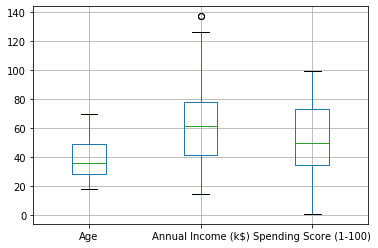

In [31]:
boxplot = df.boxplot(column = ['Age','Annual Income (k$)', 'Spending Score (1-100)'])

In [34]:
from scipy import stats
z = np.abs(stats.zscore(df['Annual Income (k$)'].values))
std = 2
result = np.where(z > 2)

df_outlier = df.iloc[result[0]]
df_outlier

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
192,193,Male,33,113,8
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


Text(0.5, 1.0, 'Distribuição dos clientes por gênero')

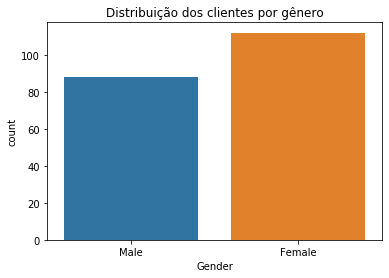

In [38]:
sns.countplot('Gender', data = df)
plt.title("Distribuição dos clientes por gênero")

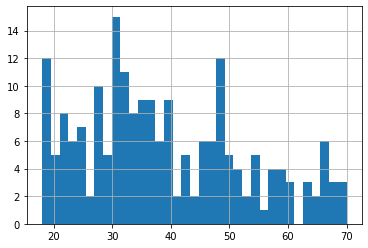

In [41]:
df['Age'].hist(bins = 35)

In [42]:
df_1 = df.copy()

In [43]:
pd.get_dummies(df_1)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
...,...,...,...,...,...,...
195,196,35,120,79,1,0
196,197,45,126,28,1,0
197,198,32,126,74,0,1
198,199,32,137,18,0,1


In [44]:
df_2 = df.copy()

In [45]:
df_2['Gender'] = pd.Categorical(df_2['Gender'])

In [46]:
df_2.dtypes

CustomerID                   int64
Gender                    category
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
dtype: object

In [47]:
df_2['Gender'] = df_2['Gender'].cat.codes

In [48]:
df_2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [49]:
from sklearn.preprocessing import LabelEncoder

In [54]:
df_1 = pd.get_dummies(df)
df_1

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
...,...,...,...,...,...,...
195,196,35,120,79,1,0
196,197,45,126,28,1,0
197,198,32,126,74,0,1
198,199,32,137,18,0,1


In [57]:
df_1[['Gender_Female','Gender_Male']].values

array([[0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1,